Importing essential libraries

In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [8]:
human  = pd.read_table('data/human_data.txt', header = None , names = ['sequence'])
human['species'] = 'Human'
dog = pd.read_table('data/dog_data.txt', header=None, names = ['sequence'])
dog['species'] = 'Dog'
chimp = pd.read_table('data/chimp_data.txt', header=None, names = ['sequence'])
chimp['species'] = 'Chimp'
df = pd.concat([human,dog,chimp], ignore_index = True)
print(f"Total sequences: {len(df)}")
print(df['species'].value_counts())

Total sequences: 6885
species
Human    4381
Chimp    1683
Dog       821
Name: count, dtype: int64


Visualizing the data before cleaning

In [16]:
print(human.describe())

       sequence species
count      4381    4381
unique        8       1
top           6   Human
freq       1343    4381


In [14]:
print(df.describe())

            length
count  6885.000000
mean      1.001743
std       0.083484
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       5.000000


In [18]:
print(df.head)

<bound method NDFrame.head of      sequence species  length
0       class   Human       5
1           4   Human       1
2           4   Human       1
3           3   Human       1
4           3   Human       1
...       ...     ...     ...
6880        5   Chimp       1
6881        5   Chimp       1
6882        6   Chimp       1
6883        3   Chimp       1
6884        3   Chimp       1

[6885 rows x 3 columns]>


     sequence species  length
0       class   Human       5
1           4   Human       1
2           4   Human       1
3           3   Human       1
4           3   Human       1
...       ...     ...     ...
6880        5   Chimp       1
6881        5   Chimp       1
6882        6   Chimp       1
6883        3   Chimp       1
6884        3   Chimp       1

[6885 rows x 3 columns]


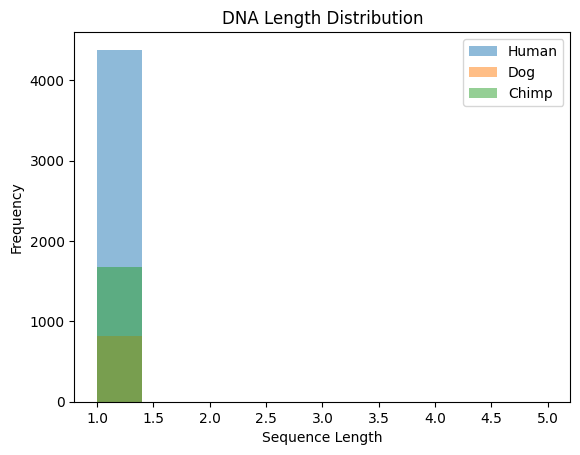

In [19]:
df['length'] = df['sequence'].str.len()
print(df)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['length'],alpha = 0.5, label = species)

plt.legend()
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("DNA Length Distribution")
plt.show()

Text(0.5, 1.0, 'DNA Length Distribution by Species')

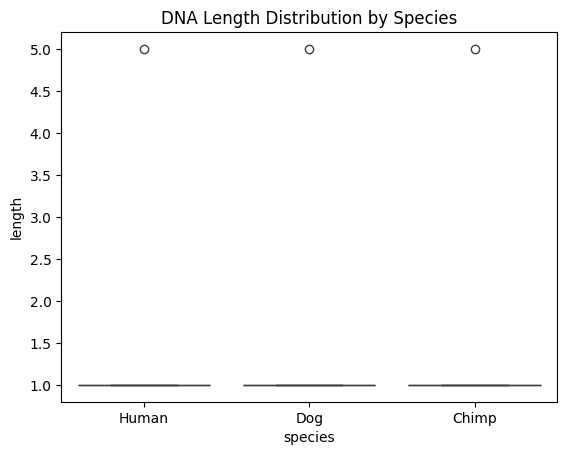

In [10]:
sns.boxplot(data = df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")

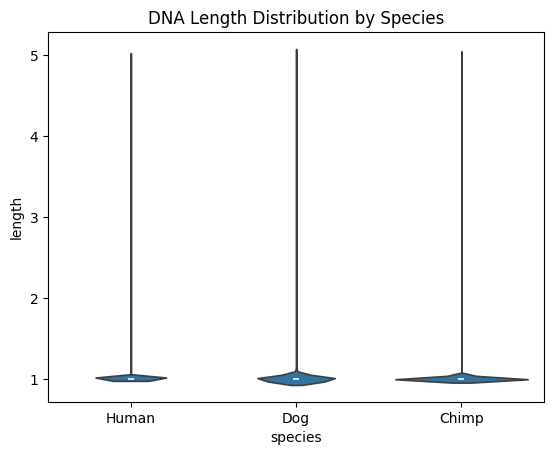

In [11]:
sns.violinplot(data=df, x = 'species', y = 'length')
plt.title("DNA Length Distribution by Species")
plt.show()

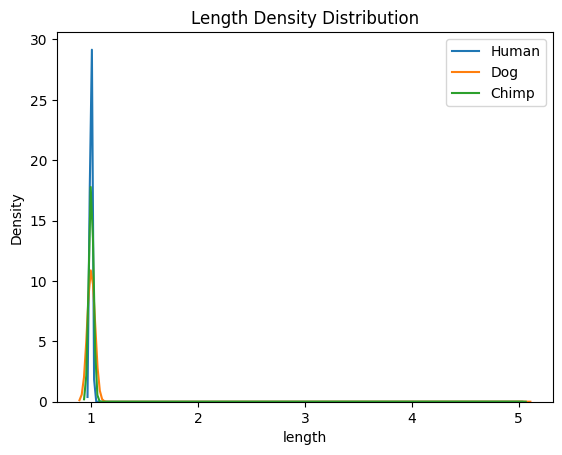

In [21]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    sns.kdeplot(subset['length'], label = species)

plt.legend()
plt.title("Length Density Distribution")
plt.show()

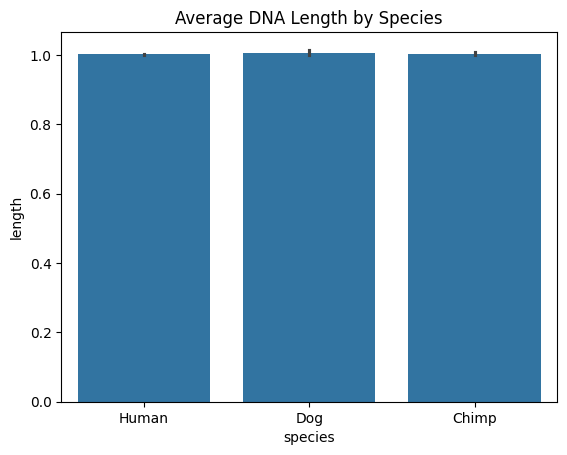

In [22]:
sns.barplot(data = df, x = 'species', y = 'length')
plt.title("Average DNA Length by Species")
plt.show()

Cleaning the sequences

In [23]:
print("\nCleaning sequences...")
valid_pattern = re.compile(r'^[ACTGactg]+$')
df = df.dropna(subset = ['sequence', 'species'])
df = df[df['sequence'].str.len() > 50]
df = df[df['sequence'].apply(lambda s: bool(valid_pattern.match(s)))]
df['sequence'] = df['sequence'].str.upper()
print(f"Clean sequences: {len(df)}")


Cleaning sequences...


KeyError: 'sequence'

Visualizing the data after cleaning

In [7]:
print(human.describe())

df['length'] = df['sequence'].str.len()

       sequence species
count      4381    4381
unique        8       1
top           6   Human
freq       1343    4381
